# Bibliotecas

In [1]:
#biblioteca para importar o dataset que vamos usar
from datasets import load_dataset

#para calculos matemáticos
import math

#pandas
#usado para acessar dataframes
import pandas as pd

#acessar um tool box de strings
import string

#bibliocas especificas para nlp
import nltk
import spacy #essa aqui é a mais atual e tem sido bem difundida #o que ela faz????
nlp = spacy.load("pt_core_news_lg")

/Users/zuilpirola/opt/anaconda3/envs/bertpt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load dataset

In [2]:
#load dataset
dataset = load_dataset("tclopess/sinopsys_movies_portuguese")

Using custom data configuration tclopess--sinopsys_movies_portuguese-d1ae3351a159e1c9
Reusing dataset parquet (/Users/zuilpirola/.cache/huggingface/datasets/parquet/tclopess--sinopsys_movies_portuguese-d1ae3351a159e1c9/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121)
100%|██████████| 2/2 [00:00<00:00, 478.91it/s]


In [3]:
#o que é um dataset?
print(type(dataset))
print(dataset.keys())

<class 'datasets.dataset_dict.DatasetDict'>
dict_keys(['train', 'test'])


In [4]:
#como acessar?
#vamos usar somente o train
print(dataset['train'])
#acessar o endereço 0 do train
print(dataset['train'][0])

Dataset({
    features: ['titulo', 'sinopse', 'generos', 'is_valid'],
    num_rows: 17947
})
{'titulo': 'We Were Soldiers', 'sinopse': 'A história da primeira grande batalha da fase americana da Guerra do Vietnã e os soldados de ambos os lados que a travaram.', 'generos': "['Ação', 'História', 'Guerra']", 'is_valid': False}


In [5]:
#converter o dataset em pandas
df_pandas = dataset['train'].to_pandas()
df_pandas.head()

,titulo,sinopse,generos,is_valid
0,We Were Soldiers,A história da primeira grande batalha da fase ...,"['Ação', 'História', 'Guerra']",False
1,4Got10,"Um negócio de drogas dá errado, deixando corpo...","['Ação', 'Crime', 'Thriller']",False
2,Pontypool,Quando o disc jockey Grant Mazzy se reporta à ...,"['Horror', 'Mistério', 'Ficção Científica']",False
3,Ticker,Depois que o parceiro de um detetive de São Fr...,"['Ação', 'Crime', 'Thriller']",False
4,Real Genius,Um adolescente prodígio tenso entra em uma fac...,"['Comédia', 'Romance', 'Ficção Científica']",True


In [6]:
#para trabalharmos com 
docs_raw = df_pandas['sinopse'].to_list()

In [7]:
docs_raw[:3]

['A história da primeira grande batalha da fase americana da Guerra do Vietnã e os soldados de ambos os lados que a travaram.',
 'Um negócio de drogas dá errado, deixando corpos. Um xerife atira em seu vice pelo dinheiro e um amnésico ferido atira no xerife e foge com $ 3.000.000. A DEA investiga, assim como o traficante pai do deputado morto.',
 'Quando o disc jockey Grant Mazzy se reporta à estação de rádio de seu porão na cidade canadense de Pontypool, ele pensa que é apenas mais um dia de trabalho. Mas quando ouve relatos de um vírus que transforma as pessoas em zumbis, Mazzy se barrica na cabine de rádio e tenta descobrir uma maneira de alertar seus ouvintes sobre o vírus e seu improvável modo de transmissão.']

# Preprocessing

## Load stopwords e pontuaçoes

In [8]:
#carregar as stopwords
from nltk.corpus import stopwords
stop = list(set(stopwords.words('portuguese')))
#esse conceito pode ajustado. Há casos onde stopwords para um tipo de trabalho nao sejam para outro tipo
print(stop)

import string  
# Storing the sets of punctuation in variable result  
pontuacoes = string.punctuation 
print(pontuacoes)

['seremos', 'vos', 'nosso', 'aquele', 'este', 'houveremos', 'seja', 'hajam', 'quem', 'estivessem', 'houveriam', 'já', 'houvessem', 'numa', 'pelas', 'haja', 'isto', 'éramos', 'sejamos', 'ele', 'terão', 'fora', 'houvéssemos', 'nos', 'teríamos', 'nem', 'teus', 'teremos', 'na', 'essa', 'for', 'houvera', 'qual', 'fôssemos', 'forem', 'ao', 'no', 'esta', 'quando', 'você', 'aquelas', 'tiveram', 'estas', 'meu', 'sem', 'teve', 'uma', 'tínhamos', 'tuas', 'tenha', 'tivéramos', 'estiver', 'sou', 'por', 'ou', 'terei', 'estes', 'tenham', 'e', 'até', 'houvéramos', 'estar', 'estivemos', 'hão', 'ser', 'seríamos', 'estivermos', 'são', 'hei', 'nossos', 'tivéssemos', 'estive', 'houver', 'o', 'das', 'os', 'terá', 'tiverem', 'aqueles', 'da', 'serão', 'tivesse', 'lhes', 'ela', 'haver', 'como', 'pelos', 'serei', 'do', 'tem', 'tiver', 'tivera', 'era', 'fomos', 'estivesse', 'houveram', 'houverão', 'houvermos', 'delas', 'houverei', 'estávamos', 'teriam', 'aquela', 'à', 'em', 'tenho', 'tivemos', 'hajamos', 'esteve

## Tokenizar

In [9]:
#gerando tokens
text = 'Eu moro em Portugal. Esse lugar lindo!'
print(text.split())

['Eu', 'moro', 'em', 'Portugal.', 'Esse', 'lugar', 'lindo!']


In [10]:
#mas para o caso acima temos um "lindo! com pontuacao junta"
#podemos também...
print([x.text for x in nlp(text)])

['Eu', 'moro', 'em', 'Portugal', '.', 'Esse', 'lugar', 'lindo', '!']


In [11]:
print([x.text.lower() for x in nlp(text) if x.text.lower() not in stop and x.text not in pontuacoes])

#transformando em funcao

def preproce_doc(text):
    tokens = [x.text.lower() for x in nlp(text) if x.text.lower() not in stop and x.text not in pontuacoes]
    return tokens

print(preproce_doc('Eu moro em Portugal. Esse lugar lindo!'))

['moro', 'portugal', 'lugar', 'lindo']
['moro', 'portugal', 'lugar', 'lindo']


## Lemmatizer

In [12]:
#há também outra maneiras de preprocessar textos mas aqui vou destacar
#Lemmatizer
text = "Amo amar aqueles que amam."
print([x.lemma_.lower() for x in nlp(text)])

text = "Amo amar aqueles que amam."
print(set([x.lemma_.lower() for x in nlp(text)]))


['amar', 'amar', 'aquele', 'que', 'amar', '.']
{'que', 'aquele', '.', 'amar'}


## Stemmers

In [13]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='portuguese')

In [14]:
text = "Amo amar aqueles que amam."
print([snow_stemmer.stem(x.text) for x in nlp(text)])


['amo', 'amar', 'aquel', 'que', 'amam', '.']


# Tf-idf

## Term Frequency (TF)

tf(t,d) = count of t in d / number of words in d

In [15]:
#pegar os 400 primeiros para ficar mais facil trabalhar
docs = [preproce_doc(x) for x in docs_raw[:400]]

In [16]:
#como os dados se parecem
docs[0]

['história',
 'primeira',
 'grande',
 'batalha',
 'fase',
 'americana',
 'guerra',
 'vietnã',
 'soldados',
 'ambos',
 'lados',
 'travaram']

In [17]:
#da pra fazer com defaultdict
#sabem como funciona?
from collections import defaultdict
dic_total = defaultdict(int)
dic_total

defaultdict(int, {})

In [18]:
#Qual a frequencia que os tokens aparecem em todos os documentos
#aqui considerando tokens que aparecem mais de uma vez em um mesmo documento
for document in docs:
    for token in document:
        dic_total[token]+=1

# dic_total

In [19]:
print(sorted(dic_total.items(), key=lambda item: item[1],reverse=True))

[('vida', 65), ('enquanto', 48), ('cidade', 40), ('mundo', 40), ('casa', 38), ('jovem', 38), ('anos', 37), ('homem', 35), ('pai', 33), ('dois', 32), ('família', 32), ('história', 31), ('sobre', 28), ('descobre', 27), ('amor', 24), ('onde', 24), ('guerra', 23), ('filme', 23), ('nova', 21), ('mulher', 20), ('deve', 20), ('filho', 20), ('começa', 19), ('tenta', 18), ('policial', 18), ('contra', 18), ('amigo', 18), ('mãe', 18), ('durante', 17), ('...', 17), ('fica', 17), ('torna', 17), ('terra', 16), ('chamado', 16), ('crime', 16), ('tudo', 16), ('encontrar', 16), ('todos', 16), ('apenas', 15), ('após', 15), ('volta', 15), ('esposa', 15), ('caminho', 15), ('pode', 15), ('the', 14), ('antes', 14), ('luta', 14), ('novo', 14), ('agente', 14), ('dinheiro', 13), ('ajuda', 13), ('logo', 13), ('assassinato', 13), ('conhece', 13), ('grande', 12), ('adolescente', 12), ('primeiro', 12), ('missão', 12), ('busca', 12), ('série', 12), ('viagem', 12), ('casal', 12), ('amigos', 12), ('prisão', 12), ('lev

In [20]:
import itertools
from collections import Counter

full_list = Counter(list(itertools.chain(*docs)))
print(full_list.most_common())


[('vida', 65), ('enquanto', 48), ('cidade', 40), ('mundo', 40), ('casa', 38), ('jovem', 38), ('anos', 37), ('homem', 35), ('pai', 33), ('dois', 32), ('família', 32), ('história', 31), ('sobre', 28), ('descobre', 27), ('amor', 24), ('onde', 24), ('guerra', 23), ('filme', 23), ('nova', 21), ('mulher', 20), ('deve', 20), ('filho', 20), ('começa', 19), ('tenta', 18), ('policial', 18), ('contra', 18), ('amigo', 18), ('mãe', 18), ('durante', 17), ('...', 17), ('fica', 17), ('torna', 17), ('terra', 16), ('chamado', 16), ('crime', 16), ('tudo', 16), ('encontrar', 16), ('todos', 16), ('apenas', 15), ('após', 15), ('volta', 15), ('esposa', 15), ('caminho', 15), ('pode', 15), ('the', 14), ('antes', 14), ('luta', 14), ('novo', 14), ('agente', 14), ('dinheiro', 13), ('ajuda', 13), ('logo', 13), ('assassinato', 13), ('conhece', 13), ('grande', 12), ('adolescente', 12), ('primeiro', 12), ('missão', 12), ('busca', 12), ('série', 12), ('viagem', 12), ('casal', 12), ('amigos', 12), ('prisão', 12), ('lev

In [21]:
#lista para criar um dataframe com os vetores BoW
list_dict_documents = []

#para cada documento
for document in docs:
    #cria-se um dicionado default
    cont_doc = Counter(document)
    dict_doc = defaultdict(int)
    for key in dic_total.keys():
        if key in cont_doc.keys():
            #faz uma soma
            dict_doc[key] = cont_doc[key]
        else:
            dict_doc[key] = 0

    #adiciona ao final do looping a linha referente ao documento
    list_dict_documents.append(dict_doc)

In [22]:
list_dict_documents[0]

defaultdict(int,
            {'história': 1,
             'primeira': 1,
             'grande': 1,
             'batalha': 1,
             'fase': 1,
             'americana': 1,
             'guerra': 1,
             'vietnã': 1,
             'soldados': 1,
             'ambos': 1,
             'lados': 1,
             'travaram': 1,
             'negócio': 0,
             'drogas': 0,
             'dá': 0,
             'errado': 0,
             'deixando': 0,
             'corpos': 0,
             'xerife': 0,
             'atira': 0,
             'vice': 0,
             'dinheiro': 0,
             'amnésico': 0,
             'ferido': 0,
             'foge': 0,
             '3.000.000': 0,
             'dea': 0,
             'investiga': 0,
             'assim': 0,
             'traficante': 0,
             'pai': 0,
             'deputado': 0,
             'morto': 0,
             'disc': 0,
             'jockey': 0,
             'grant': 0,
             'mazzy': 0,
             'r

In [23]:
#criando o dataframe
df_cont = pd.DataFrame(list_dict_documents)
df_cont

,história,primeira,grande,batalha,fase,americana,guerra,vietnã,soldados,ambos,...,cargueiro,duzentos,batalhador,funeral,discos,testamento,estipula,entregar,150.000,existia
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,1,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [24]:
#fazer o mesmo para um dataframe de tf
list_dict_tfs = []
#corre-se cada documento
for document in list_dict_documents:
    #soma a quantidade de tokens do documento
    sum_document = sum([x for x in document.values()])
    #cria-se um dict de
    dict_doct = defaultdict(int)
    for key in document.keys():
        #fazer a conta da quantidade daquela palavra especifica em relacao a ao total de palavras
        dict_doct[key]+= document[key]/sum_document

    #adiciona no final para criar o dataframe
    list_dict_tfs.append(dict_doct)

In [25]:
#criar o dataframe
df_tf = pd.DataFrame(list_dict_tfs)
df_tf

#isso aqui é o TF para um dado documento

,história,primeira,grande,batalha,fase,americana,guerra,vietnã,soldados,ambos,...,cargueiro,duzentos,batalhador,funeral,discos,testamento,estipula,entregar,150.000,existia
0,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
398,0.050000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,...,0.05,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
df_cont[df_cont['história']>=1]

,história,primeira,grande,batalha,fase,americana,guerra,vietnã,soldados,ambos,...,cargueiro,duzentos,batalhador,funeral,discos,testamento,estipula,entregar,150.000,existia
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_tf.shape

(400, 4590)

## Inverse Document Frequency (IDF)

idf(t) = log10(N/df)+1

In [28]:
#df(t) = occurrence of t in documents¶
# aqui desconsidero se o termo aparece mais de uma vez no mesmo documento
dic_dt = defaultdict(int)
for document in docs:
    #aqui retira os termos repetidos
    for token in set(document):
        dic_dt[token]+=1

# dic_dt

In [29]:
dic_dt['história']

30

In [30]:
#calcula o idf para cada termo
# o idf é um calculo do termo em relaçao ao set de documentos
dic_idf = {}
for key in dic_dt:
    dic_idf[key]=math.log(len(docs)/(dic_dt[key]))+1


# dic_idf

In [31]:
dic_idf

{'ambos': 6.991464547107982,
 'soldados': 5.382026634673881,
 'lados': 6.991464547107982,
 'fase': 6.991464547107982,
 'travaram': 6.991464547107982,
 'guerra': 4.0470255679415414,
 'americana': 5.382026634673881,
 'grande': 4.506557897319982,
 'primeira': 5.199705077879927,
 'batalha': 5.199705077879927,
 'vietnã': 5.892852258439873,
 'história': 3.5902671654458267,
 'errado': 5.382026634673881,
 'vice': 6.991464547107982,
 'traficante': 5.892852258439873,
 'dá': 6.298317366548036,
 'dinheiro': 4.506557897319982,
 '3.000.000': 6.991464547107982,
 'dea': 6.991464547107982,
 'deixando': 6.298317366548036,
 'atira': 6.991464547107982,
 'drogas': 5.199705077879927,
 'deputado': 6.991464547107982,
 'assim': 4.912023005428146,
 'corpos': 6.991464547107982,
 'negócio': 5.892852258439873,
 'amnésico': 6.991464547107982,
 'xerife': 5.605170185988092,
 'morto': 5.045554398052669,
 'investiga': 5.199705077879927,
 'pai': 3.659260036932778,
 'foge': 5.382026634673881,
 'ferido': 5.605170185988092

## TF-IDF

In [32]:
#calcular o tf-idf de um termo
termo = 'história'

In [33]:
#tfs do termo para os documentos que ele aparece
df_tf[df_tf[termo]>0][termo]

0      0.083333
10     0.027778
14     0.016393
45     0.062500
52     0.033333
82     0.040000
89     0.125000
90     0.025000
105    0.076923
108    0.022727
117    0.142857
151    0.111111
154    0.062500
187    0.058824
188    0.043478
200    0.025641
210    0.052632
244    0.045455
248    0.066667
261    0.011905
270    0.071429
286    0.027027
305    0.055556
329    0.086957
337    0.076923
342    0.058824
352    0.050000
360    0.058824
398    0.050000
399    0.033333
Name: história, dtype: float64

In [34]:
#converter em lista
tfs = df_tf[df_tf[termo]>0][termo].to_list()
tfs

[0.08333333333333333,
 0.027777777777777776,
 0.01639344262295082,
 0.0625,
 0.03333333333333333,
 0.04,
 0.125,
 0.025,
 0.07692307692307693,
 0.022727272727272728,
 0.14285714285714285,
 0.1111111111111111,
 0.0625,
 0.058823529411764705,
 0.043478260869565216,
 0.02564102564102564,
 0.05263157894736842,
 0.045454545454545456,
 0.06666666666666667,
 0.011904761904761904,
 0.07142857142857142,
 0.02702702702702703,
 0.05555555555555555,
 0.08695652173913043,
 0.07692307692307693,
 0.058823529411764705,
 0.05,
 0.058823529411764705,
 0.05,
 0.03333333333333333]

In [35]:
#calcular os tf-idfs do termo em cada um dos documentos
print([x*dic_idf[termo] for x in tfs])

[0.2991889304538189, 0.09972964348460629, 0.058856838777800444, 0.22439169784036417, 0.11967557218152755, 0.14361068661783308, 0.44878339568072834, 0.08975667913614567, 0.2761743973419867, 0.0815969810328597, 0.5128953093494037, 0.39891857393842517, 0.22439169784036417, 0.2111921862026957, 0.1560985724106881, 0.09205813244732888, 0.18896142976030667, 0.1631939620657194, 0.2393511443630551, 0.04274127577911698, 0.2564476546747019, 0.09703424771475208, 0.19945928696921258, 0.3121971448213762, 0.2761743973419867, 0.2111921862026957, 0.17951335827229134, 0.2111921862026957, 0.17951335827229134, 0.11967557218152755]


In [36]:
dic_idf[termo]

3.5902671654458267

In [37]:
#The resulting TF-IDF score reflects the importance of a term for a document in the corpus.

In [38]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer

# create object
tfidf = TfidfVectorizer()
# get tf-df values
result = tfidf.fit_transform([' '.join(x) for x in docs])
result.shape
#diferente pq nao é alfa


(400, 4547)

In [39]:
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
 



Word indexes:
{'história': 2116, 'primeira': 3408, 'grande': 2034, 'batalha': 535, 'fase': 1792, 'americana': 269, 'guerra': 2052, 'vietnã': 4393, 'soldados': 3959, 'ambos': 263, 'lados': 2478, 'travaram': 4241, 'negócio': 2965, 'drogas': 1433, 'dá': 1448, 'errado': 1584, 'deixando': 1191, 'corpos': 1062, 'xerife': 4505, 'atira': 435, 'vice': 4388, 'dinheiro': 1344, 'amnésico': 278, 'ferido': 1827, 'foge': 1886, '000': 0, 'dea': 1167, 'investiga': 2328, 'assim': 408, 'traficante': 4205, 'pai': 3111, 'deputado': 1206, 'morto': 2843, 'disc': 1358, 'jockey': 2396, 'grant': 2036, 'mazzy': 2720, 'reporta': 3653, 'estação': 1654, 'rádio': 3771, 'porão': 3339, 'cidade': 828, 'canadense': 682, 'pontypool': 3328, 'pensa': 3198, 'apenas': 338, 'dia': 1329, 'trabalho': 4202, 'ouve': 3094, 'relatos': 3633, 'vírus': 4470, 'transforma': 4218, 'pessoas': 3261, 'zumbis': 4523, 'barrica': 523, 'cabine': 662, 'tenta': 4098, 'descobrir': 1234, 'maneira': 2669, 'alertar': 209, 'ouvintes': 3095, 'sobre': 

In [40]:
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    if ele1 == termo:
        print(ele1, ':', ele2)


idf values:
história : 3.559974222821423


/Users/zuilpirola/opt/anaconda3/envs/bertpt/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# LDA

In [41]:
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel

In [42]:
#talvez adicionar palavras?
#uma black list?
#e sobre documentos curto?

In [43]:
stop = list(set(stopwords.words('portuguese')))
#esse conceito pode ajustado. Há casos onde stopwords para um tipo de trabalho nao sejam para outro tipo
print(stop)

['seremos', 'vos', 'nosso', 'aquele', 'este', 'houveremos', 'seja', 'hajam', 'quem', 'estivessem', 'houveriam', 'já', 'houvessem', 'numa', 'pelas', 'haja', 'isto', 'éramos', 'sejamos', 'ele', 'terão', 'fora', 'houvéssemos', 'nos', 'teríamos', 'nem', 'teus', 'teremos', 'na', 'essa', 'for', 'houvera', 'qual', 'fôssemos', 'forem', 'ao', 'no', 'esta', 'quando', 'você', 'aquelas', 'tiveram', 'estas', 'meu', 'sem', 'teve', 'uma', 'tínhamos', 'tuas', 'tenha', 'tivéramos', 'estiver', 'sou', 'por', 'ou', 'terei', 'estes', 'tenham', 'e', 'até', 'houvéramos', 'estar', 'estivemos', 'hão', 'ser', 'seríamos', 'estivermos', 'são', 'hei', 'nossos', 'tivéssemos', 'estive', 'houver', 'o', 'das', 'os', 'terá', 'tiverem', 'aqueles', 'da', 'serão', 'tivesse', 'lhes', 'ela', 'haver', 'como', 'pelos', 'serei', 'do', 'tem', 'tiver', 'tivera', 'era', 'fomos', 'estivesse', 'houveram', 'houverão', 'houvermos', 'delas', 'houverei', 'estávamos', 'teriam', 'aquela', 'à', 'em', 'tenho', 'tivemos', 'hajamos', 'esteve

In [44]:
black_list = ['enquanto',
              'então',
              '...',
              'filme',
              'sobre',
              'baseado',
              'filmes']
stop = stop + black_list

In [45]:
def preproce_doc(text):
    tokens = [x.lemma_.lower() for x in nlp(text) if x.text.lower() not in stop and x.text not in pontuacoes]
    return tokens


In [46]:
#pegar os 5000 primeiros para ficar mais facil trabalhar
docs = [preproce_doc(x) for x in docs_raw[:5000]]

In [47]:
docs[0]

['história',
 'primeiro',
 'grande',
 'batalha',
 'fase',
 'americano',
 'guerra',
 'vietnã',
 'soldado',
 'ambos',
 'lado',
 'travar']

In [48]:
# Create Dictionary
id2word = corpora.Dictionary(docs)

In [49]:
id2word[0]

'ambos'

In [50]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in docs]

In [51]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1)]

In [52]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1)]

In [53]:
# id_words = [[(id2word[id], count) for id, count in line] for line in corpus]
# print(id_words[0])

In [54]:
# Set number of topics
num_topics = 20

In [55]:
# Build LDA model
lda_model = LdaModel(
    corpus=corpus, 
    id2word=id2word, 
    num_topics=num_topics,
    passes=20,
    random_state=100
    )


# random_state: This is comparable to 'seed' in many packages and libraries. LDA is probabilistic, not deterministic. This means that, even were we to train models with the same parameters on the same corpus, our models might vary minutely each time. random_state helps mitigate this variation and thereby aid reproducibility.
# num_topics: The number of topics into which the model distributes words and documents. Methods for choosing an appropriate number of topics is an ongoing area of research.
# passes: The number of times the algorithm passes through the whole corpus. This is comparable to 'epochs' in other packages and libraries.

In [56]:
# Print the keywords for each topic
#Researchers use both qualitative and quantitative methods to evaluate models
lda_model.print_topics(num_words=20)

#Topics are words with highest probability in topic and the numbers are the probabilities of words appearing in topic distribution.

[(0,
  '0.029*"ladrão" + 0.017*"prisão" + 0.012*"banco" + 0.011*"diamante" + 0.011*"roubo" + 0.010*"roubar" + 0.009*"acabar" + 0.008*"briga" + 0.007*"notório" + 0.007*"operação" + 0.006*"determinado" + 0.006*"gravemente" + 0.006*"vigarista" + 0.006*"sonhar" + 0.006*"libertar" + 0.005*"mumbai" + 0.005*"cruzar" + 0.005*"recrutar" + 0.005*"década" + 0.005*"criminoso"'),
 (1,
  '0.009*"poder" + 0.008*"fantasma" + 0.007*"casa" + 0.007*"descobrir" + 0.007*"fazer" + 0.006*"trabalho" + 0.006*"criança" + 0.005*"ano" + 0.005*"começar" + 0.005*"tudo" + 0.005*"roubar" + 0.005*"tentar" + 0.005*"pesadelo" + 0.005*"dever" + 0.004*"família" + 0.004*"the" + 0.004*"lançar" + 0.004*"max" + 0.004*"dentro" + 0.004*"caso"'),
 (2,
  '0.009*"brutal" + 0.007*"cinco" + 0.006*"policial" + 0.006*"ataque" + 0.006*"general" + 0.006*"soviético" + 0.005*"aventureiro" + 0.005*"exército" + 0.005*"missão" + 0.005*"guerreiro" + 0.005*"apple" + 0.005*"primeiro" + 0.004*"número" + 0.004*"envolver" + 0.004*"assumir" + 0.004

In [57]:
docs[6]

['pai',
 'tim',
 'robbins',
 'chamar',
 'trabalhar',
 'dois',
 'menino',
 'walter',
 'josh',
 'hutcherson',
 'danny',
 'jonah',
 'bobo',
 'deixar',
 'cuidado',
 'irmã',
 'adolescente',
 'lisa',
 'kristen',
 'stewart',
 'dever',
 'ficar',
 'dentro',
 'casa',
 'walter',
 'danny',
 'antecipar',
 'dia',
 'chato',
 'ficar',
 'chocado',
 'começar',
 'jogar',
 'zathura',
 'jogo',
 'tabuleiro',
 'tema',
 'espacial',
 'perceber',
 'ter',
 'poder',
 'místico',
 'casa',
 'lançar',
 'espaço',
 'ajuda',
 'astronauta',
 'dax',
 'shepard',
 'menino',
 'tentar',
 'voltar',
 'casa']

In [58]:
# generate document-topic distributions
for i, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)
    print(f"Document {i}: {doc_topics}")

Document 0: [(11, 0.39494115), (17, 0.30584547), (19, 0.23380707)]
Document 1: [(3, 0.09760756), (6, 0.5599592), (9, 0.115962364), (19, 0.19310457)]
Document 2: [(13, 0.79018575), (17, 0.1112813), (19, 0.07418325)]
Document 3: [(6, 0.29626447), (14, 0.63931304)]
Document 4: [(0, 0.046169408), (3, 0.34071985), (5, 0.16045742), (6, 0.32927826), (19, 0.09335043)]
Document 5: [(17, 0.9547525)]
Document 6: [(1, 0.104353294), (5, 0.31377938), (9, 0.025009252), (11, 0.033618603), (13, 0.3152222), (15, 0.026417905), (16, 0.12390833), (18, 0.046556685)]
Document 7: [(0, 0.18298295), (4, 0.44182685), (6, 0.3185065)]
Document 8: [(11, 0.8673642), (16, 0.10046178)]
Document 9: [(1, 0.31087178), (16, 0.24543147), (17, 0.23754175), (19, 0.1489814)]
Document 10: [(5, 0.97359693)]
Document 11: [(17, 0.949968)]
Document 12: [(0, 0.1306024), (3, 0.1113496), (4, 0.19306603), (6, 0.34361935), (10, 0.10345675), (11, 0.08604319)]
Document 13: [(5, 0.92418116), (18, 0.042459115)]
Document 14: [(2, 0.32597154

In [59]:
# for LDA evaluation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvisualize

pyLDAvis.enable_notebook(local=True)

In [60]:
dickens_visual = gensimvisualize.prepare(lda_model, corpus, id2word, mds='mmds',sort_topics=False)
pyLDAvis.display(dickens_visual)

/Users/zuilpirola/opt/anaconda3/envs/bertpt/lib/python3.8/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [61]:
# generate document-topic distributions
list_docs_guerra = []
for i, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)
    for topic,percent in doc_topics:
        if (topic==11 and percent>.60) or (topic==17 and percent>.60):
            print(f"Document {i}: {doc_topics}")
            list_docs_guerra.append(i)


Document 5: [(17, 0.9547525)]
Document 8: [(11, 0.8673654), (16, 0.10046056)]
Document 11: [(17, 0.949968)]
Document 30: [(3, 0.1275552), (5, 0.22773165), (11, 0.62537366)]
Document 43: [(11, 0.9472117)]
Document 46: [(11, 0.85116625), (13, 0.12449349)]
Document 47: [(17, 0.97284436)]
Document 52: [(10, 0.10319798), (17, 0.8677412)]
Document 65: [(11, 0.93661124)]
Document 85: [(11, 0.73693466), (13, 0.2434842)]
Document 111: [(2, 0.17020668), (7, 0.11899983), (17, 0.6152485), (18, 0.055513572)]
Document 127: [(11, 0.72105086), (17, 0.24144164)]
Document 128: [(17, 0.9321276)]
Document 154: [(17, 0.9406108)]
Document 156: [(1, 0.05557572), (8, 0.112435795), (12, 0.14937337), (17, 0.66353816)]
Document 163: [(10, 0.22199942), (17, 0.71796924)]
Document 170: [(10, 0.18610826), (16, 0.06154018), (17, 0.718326)]
Document 174: [(11, 0.9366393)]
Document 182: [(13, 0.35080734), (17, 0.6241695)]
Document 193: [(3, 0.20343065), (11, 0.77155817)]
Document 233: [(11, 0.9660522)]
Document 313: [(

In [62]:
# generate document-topic distributions
list_docs_guerra = []
for i, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)
    list_topics = [x[0] for x in doc_topics]
    if 11 in list_topics or 17 in list_topics:
        print(f"Document {i}: {doc_topics}")
        list_docs_guerra.append(i)

Document 0: [(11, 0.39987096), (17, 0.30132732), (19, 0.23339535)]
Document 2: [(13, 0.7901846), (17, 0.111281745), (19, 0.07418398)]
Document 5: [(17, 0.9547525)]
Document 6: [(1, 0.10441487), (5, 0.31377485), (9, 0.02500978), (11, 0.033604845), (13, 0.31517), (15, 0.026408242), (16, 0.12392511), (18, 0.04655798)]
Document 8: [(11, 0.86737436), (16, 0.10045168)]
Document 9: [(1, 0.31083876), (16, 0.24567054), (17, 0.23733422), (19, 0.14898287)]
Document 11: [(17, 0.949968)]
Document 12: [(0, 0.13067645), (3, 0.11119807), (4, 0.19306451), (6, 0.34369498), (10, 0.10345632), (11, 0.08604695)]
Document 14: [(2, 0.32598102), (4, 0.112563), (6, 0.110103175), (7, 0.14118654), (9, 0.07498953), (11, 0.058625564), (15, 0.043182194), (17, 0.12352432)]
Document 16: [(5, 0.34248), (11, 0.26735848), (15, 0.08864888), (19, 0.23992817)]
Document 17: [(4, 0.6305614), (11, 0.19074827), (18, 0.14002205)]
Document 22: [(6, 0.38750157), (11, 0.17307827), (14, 0.3739842)]
Document 30: [(3, 0.12756784), (5,

In [63]:
import json

In [64]:
df_pandas_new = df_pandas.head(5000)

In [65]:
df_pandas_new['generos'] = [json.loads(x.replace("'",'"')) for x in df_pandas_new['generos'].to_list()]
# df_pandas_new


/var/folders/dk/tgx2lhxj52s1l1spxdf3r2mh0000gn/T/ipykernel_50110/1128222656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandas_new['generos'] = [json.loads(x.replace("'",'"')) for x in df_pandas_new['generos'].to_list()]


In [66]:
len(list_docs_guerra)

1891

In [67]:
df_pandas_new.iloc[list_docs_guerra]

,titulo,sinopse,generos,is_valid
0,We Were Soldiers,A história da primeira grande batalha da fase ...,"[Ação, História, Guerra]",False
2,Pontypool,Quando o disc jockey Grant Mazzy se reporta à ...,"[Horror, Mistério, Ficção Científica]",False
5,Injustice,"Em uma Terra alternativa, o Coringa engana o S...","[Animação, Ação, Aventura]",True
6,Zathura: A Space Adventure,Depois que seu pai (Tim Robbins) é chamado par...,"[Família, Fantasia, Ficção Científica, Aventura]",False
8,Paranormal Activity 2,Assim que Dan e Kristi dão as boas-vindas a um...,"[Horror, Thriller]",False
...,...,...,...,...
4992,Mary and Martha,A rica dona de casa americana Mary Morgan leva...,[Drama],False
4993,Summer School,Um professor de ginástica do ensino médio tem ...,[Comédia],False
4997,The Battle: Roar to Victory,"Durante um período de 4 dias, uma batalha fero...","[Ação, Drama, História]",False
4998,The 12th Man,Eram 12 sabotadores. Os nazistas mataram 11 de...,"[Drama, História, Thriller]",True


In [68]:
docs[4993]

['professor',
 'ginástica',
 'ensino',
 'médio',
 'grande',
 'plano',
 'verão',
 'forçar',
 'cancelá-los',
 'dar',
 'aula',
 'inglês',
 'estúpido',
 'aluno',
 'desajustar',
 'idiota',
 'felizmente',
 'tipo',
 'convencional',
 'viagem',
 'divertido',
 'ensino',
 'começar',
 'conectar',
 'inspirar',
 'ardor',
 'algum']

In [69]:
df_pandas_new[[True if 'Guerra' in x else False for x in df_pandas_new['generos'].to_list()]]

,titulo,sinopse,generos,is_valid
0,We Were Soldiers,A história da primeira grande batalha da fase ...,"[Ação, História, Guerra]",False
118,Twelve O'Clock High,Um general duro como pregos (Gregory Peck como...,"[Drama, Guerra]",True
174,Kajaki,Soldados britânicos que guardavam a represa Ka...,"[Thriller, Guerra, Aventura, Drama]",False
208,Home of the Brave,Três soldados lutam para se reajustar à vida e...,"[Ação, Drama, Guerra]",False
214,Nomad,The Nomad é um épico histórico ambientado no C...,"[Ação, História, Guerra]",False
...,...,...,...,...
4671,The Wild Geese,Uma empresa multinacional britânica procura de...,"[Ação, Thriller, Guerra]",False
4765,Essential Killing,Um prisioneiro de guerra afegão tenta escapar.,"[Ação, Thriller, Guerra]",False
4826,Nicholas and Alexandra,"Biografia do último monarca russo, o czar Nico...","[Romance, Drama, Guerra]",False
4848,Zulu,"Em 1879, durante as guerras Zulu, o homem do p...","[Ação, Drama, História, Guerra]",False


In [70]:
annoted = df_pandas_new[[True if 'Guerra' in x else False for x in df_pandas_new['generos'].to_list()]].index.to_list()

In [71]:
print(set(list_docs_guerra) & set(annoted))

{0, 2049, 2567, 530, 3090, 3094, 3611, 4127, 2080, 1575, 4650, 3630, 2610, 4660, 4152, 573, 4671, 4160, 590, 600, 1114, 2139, 2141, 2654, 2144, 2656, 610, 3683, 2163, 2676, 2169, 2178, 1157, 2196, 1175, 4765, 672, 174, 3262, 3786, 208, 1234, 216, 729, 4826, 2778, 1249, 3302, 1776, 4848, 3315, 262, 3855, 1308, 1311, 1324, 827, 1867, 4428, 3917, 2390, 2410, 881, 3444, 2424, 3969, 3973, 1416, 394, 1434, 947, 3510, 4026, 2504, 1998, 2005, 2009, 2012, 2017, 4066, 2024, 2030, 1007, 1008, 3056, 4598}


# Word2Vec

In [72]:
# importing all necessary modules
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 

In [73]:
#pegar os 400 primeiros para ficar mais facil trabalhar
docs = [preproce_doc(x) for x in docs_raw]

In [74]:
import itertools
from collections import Counter

full_list = Counter(list(itertools.chain(*docs)))
print(full_list.most_common())

[('vida', 2954), ('ano', 2148), ('jovem', 1965), ('descobrir', 1934), ('dois', 1839), ('encontrar', 1819), ('poder', 1780), ('homem', 1756), ('fazer', 1716), ('cidade', 1676), ('dever', 1589), ('história', 1586), ('amigo', 1550), ('família', 1514), ('todo', 1506), ('pai', 1467), ('mundo', 1451), ('novo', 1451), ('tentar', 1393), ('tornar', 1346), ('começar', 1239), ('casa', 1180), ('contra', 1138), ('guerra', 1123), ('outro', 1123), ('filho', 1110), ('grande', 1103), ('mulher', 1069), ('onde', 1028), ('grupo', 1010), ('levar', 972), ('durante', 929), ('ficar', 904), ('após', 896), ('conhecer', 880), ('lutar', 867), ('policial', 864), ('assassino', 853), ('matar', 845), ('tudo', 841), ('vez', 796), ('ir', 772), ('ter', 771), ('próprio', 771), ('ver', 769), ('dia', 764), ('assassinato', 761), ('morte', 754), ('pequeno', 748), ('bom', 747), ('apenas', 745), ('chamar', 740), ('filha', 740), ('mãe', 738), ('salvar', 734), ('amor', 730), ('três', 727), ('adolescente', 720), ('decidir', 719),

In [75]:
# Create CBOW model
model1 = gensim.models.Word2Vec(docs, min_count=1,
                                vector_size=100)

In [76]:
model1.wv['guerra']

array([-0.9183494 ,  0.3613605 ,  0.65639025, -0.36955887, -2.0924976 ,
       -3.2779212 ,  1.0002636 ,  2.3000762 , -1.5796012 , -1.4556658 ,
       -0.76470995, -0.8784125 , -0.93159246,  1.5283312 , -0.08881299,
       -0.7591599 ,  0.8231158 ,  0.7025596 , -1.5018278 , -1.6509439 ,
       -0.21070872, -0.00346919, -0.6456471 , -0.8109949 , -2.0949605 ,
       -1.2557266 , -0.5723779 , -0.42826462, -0.29791734, -0.06442565,
        2.36468   ,  1.3884938 ,  1.1149225 , -0.01289248,  0.2786051 ,
        0.730485  ,  1.1369613 , -3.2069578 , -0.49434733, -0.6578901 ,
       -0.28218618, -2.2065673 ,  1.3348951 ,  0.03126671,  2.6047244 ,
       -0.60981584,  0.52197605, -0.9677289 ,  2.0875251 , -0.11080655,
        1.2426621 ,  0.87486565,  0.2033231 , -0.04814652,  0.727889  ,
        1.7510917 ,  1.2397112 ,  1.6791075 , -0.06006636,  2.0955174 ,
        1.3210939 , -0.8612992 ,  0.8502932 ,  0.13824522, -0.9392002 ,
        1.6562096 , -1.9808332 , -0.32917657, -1.856931  ,  1.70

In [77]:
len(model1.wv['guerra'])

100

In [78]:
# Print results
print("Cosine similarity between 'guerra' " +
      "and 'batalha' - CBOW : ",
      model1.wv.similarity('guerra', 'batalha'))

Cosine similarity between 'guerra' and 'batalha' - CBOW :  0.86222273


In [79]:
# Print results
print("Cosine similarity between 'guerra' " +
      "and 'amor' - CBOW : ",
      model1.wv.similarity('guerra', 'amor'))

Cosine similarity between 'guerra' and 'amor' - CBOW :  0.41181877


In [80]:
# Print results
print("Cosine similarity between 'guerra' " +
      "and 'homem' - CBOW : ",
      model1.wv.similarity('guerra', 'homem'))

Cosine similarity between 'guerra' and 'homem' - CBOW :  0.38209313


In [81]:
# Print results
print("Cosine similarity between 'guerra' " +
      "and 'mulher' - CBOW : ",
      model1.wv.similarity('guerra', 'mulher'))

Cosine similarity between 'guerra' and 'mulher' - CBOW :  0.31052202


In [82]:
# Print results
print("Cosine similarity between 'homem' " +
      "and 'cuidar' - CBOW : ",
      model1.wv.similarity('homem', 'cuidar'))

Cosine similarity between 'homem' and 'cuidar' - CBOW :  0.9315119


In [83]:
# Print results
print("Cosine similarity between 'mulher' " +
      "and 'cuidar' - CBOW : ",
      model1.wv.similarity('mulher', 'cuidar'))

Cosine similarity between 'mulher' and 'cuidar' - CBOW :  0.9517891


In [84]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [85]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform([model1.wv[x] for x in model1.wv.key_to_index])



/Users/zuilpirola/opt/anaconda3/envs/bertpt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/zuilpirola/opt/anaconda3/envs/bertpt/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [175]:
# words_to_plot = ['guerra','amor','soldado','homem','mulher','vencer','perder']
# words_to_plot = ['homem','mulher','filho','cuidar']
# words_to_plot = ['homem','branco','negro','racismo','sofrer','sofrimento']
words_to_plot = ['brasil','portugal','eua','europa','china','frança','holanda','turquia','cuba']
# words_to_plot = [x[0] for x in full_list.most_common()[:10]]

list_to_plot = []

for id,word in enumerate(model1.wv.key_to_index):
    if word in words_to_plot:
        list_to_plot.append((word,new_values[id]))


In [176]:
list_to_plot

[('eua', array([126.243996, -10.544449], dtype=float32)),
 ('frança', array([119.362564 ,   1.0842347], dtype=float32)),
 ('europa', array([108.20447 ,   8.808584], dtype=float32)),
 ('china', array([106.35586 ,  15.368553], dtype=float32)),
 ('cuba', array([64.18685 , 55.281155], dtype=float32)),
 ('brasil', array([47.252457, 37.39211 ], dtype=float32)),
 ('turquia', array([ 67.897964, -16.208546], dtype=float32)),
 ('holanda', array([57.65271  , -4.4755263], dtype=float32)),
 ('portugal', array([ 18.925966, -16.98472 ], dtype=float32))]

<Figure size 72000x360000 with 0 Axes>

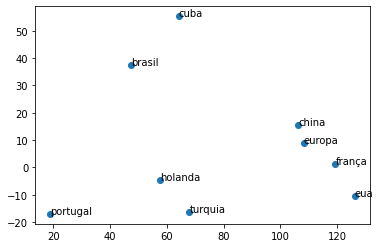

In [177]:
import matplotlib.pyplot as plt
x = [x[1][0] for x in list_to_plot]
y = [x[1][1] for x in list_to_plot]
# n = [58, 651, 393, 203, 123]

plt.figure(figsize=(1000,5000))

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(list_to_plot):
    ax.annotate(txt[0], (x[i], y[i]))

# plt.figure(figsize=(10,6))
plt.savefig('foo.png',dpi = 200)